In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

**Read the data and study it**

In [ ]:
df = pd.read_csv("roo_data.csv")

In [ ]:
print("The shape of the data is :- ",df.shape[0]," rows, ",df.shape[1]," columns")
print("The number of features is :- ",df.shape[1]-1)
print("The number of data points is :- ",df.shape[0])

The shape of the data is :-  20000  rows,  39  columns
The number of features is :-  38
The number of data points is :-  20000


In [ ]:
print("The columns are :- ")
print(df.columns)

The columns are :- 
Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expecte

**Club the job roles into 8 classes**

In [ ]:
d = {'Database Developer': 'Developer',
     'Portal Administrator': 'Administrator',
     'Systems Security Administrator': 'Administrator',
     'Business Systems Analyst': 'Analyst',
     'Software Systems Engineer': 'Engineer',
     'Business Intelligence Analyst': 'Analyst',
     'CRM Technical Developer': 'Developer',
     'Mobile Applications Developer': 'Developer',
     'UX Designer': 'Designer',
     'Quality Assurance Associate': 'Associate',
     'Web Developer': 'Developer',
     'Information Security Analyst': 'Analyst',
     'CRM Business Analyst': 'Analyst',
     'Technical Support': 'Support',
     'Project Manager': 'Manager',
     'Information Technology Manager': 'Manager',
     'Programmer Analyst': 'Analyst',
     'Design & UX': 'Designer',
     'Solutions Architect': 'Designer',
     'Systems Analyst': 'Analyst',
     'Network Security Administrator': 'Administrator',
     'Data Architect': 'Designer',
     'Software Developer': 'Developer',
     'E-Commerce Analyst': 'Analyst',
     'Technical Services/Help Desk/Tech Support': 'Support',
     'Information Technology Auditor': 'Associate',
     'Database Manager': 'Manager',
     'Applications Developer': 'Developer',
     'Database Administrator': 'Administrator',
     'Network Engineer': 'Engineer',
     'Software Engineer': 'Engineer',
     'Technical Engineer': 'Engineer',
     'Network Security Engineer': 'Engineer',
     'Software Quality Assurance (QA) / Testing': 'Associate'}

In [ ]:
for i in range(len(df['Suggested Job Role'])):
  df['Suggested Job Role'][i] = d[df['Suggested Job Role'][i]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Connect this data with the electives advisory system by renaming the percentage columns to the electives we considered in Assignment 1**

In [ ]:
df.rename(columns = {'Acedamic percentage in Operating Systems': 'Percentage in Machine Learning',
                     'Percentage in Programming Concepts': 'Percentage in Databases',
                     'Percentage in Software Engineering': 'Percentage in Software Egineering',
                     'Percentage in Computer Architecture': 'Percentage in Design',
                     'Percentage in Mathematics': 'Percentage in Biology',
                     'Percentage in Communication skills': 'Percentage in Social Science',
                     'Percentage in Computer Networks': 'Percentage in Networking',
                     'percentage in Algorithms': 'Percentage in Algorithms',
                     'Percentage in Electronics Subjects': 'Percentage in Electronics'}, inplace = True)

In [ ]:
print("The new columns after connecting data to electives advisory system :-")
print(df.columns)

The new columns after connecting data to electives advisory system :-
Index(['Percentage in Machine Learning', 'Percentage in Algorithms',
       'Percentage in Databases', 'Percentage in Software Egineering',
       'Percentage in Networking', 'Percentage in Electronics',
       'Percentage in Design', 'Percentage in Biology',
       'Percentage in Social Science', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

**Get frequency of each class label**

In [ ]:
print("The class count are as follows :- ")
print(df['Suggested Job Role'].value_counts())

The class count are as follows :- 
Analyst          3874
Developer        3394
Engineer         2973
Administrator    2860
Designer         2319
Manager          1763
Associate        1694
Support          1123
Name: Suggested Job Role, dtype: int64


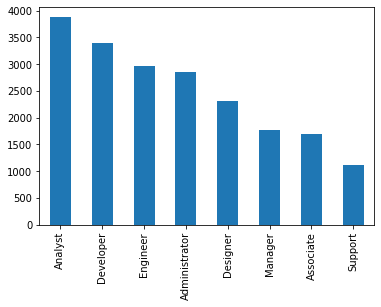

In [ ]:
df['Suggested Job Role'].value_counts().plot.bar()

**Preprocessing by using Label Encoder for the categorical columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
for column in df.columns:
  if df[column].dtype != 'int64':
    df[column]= label_encoder.fit_transform(df[column])

**Further study the data by getting heatmap of correlation matrix between the features**


In [ ]:
import seaborn as sns

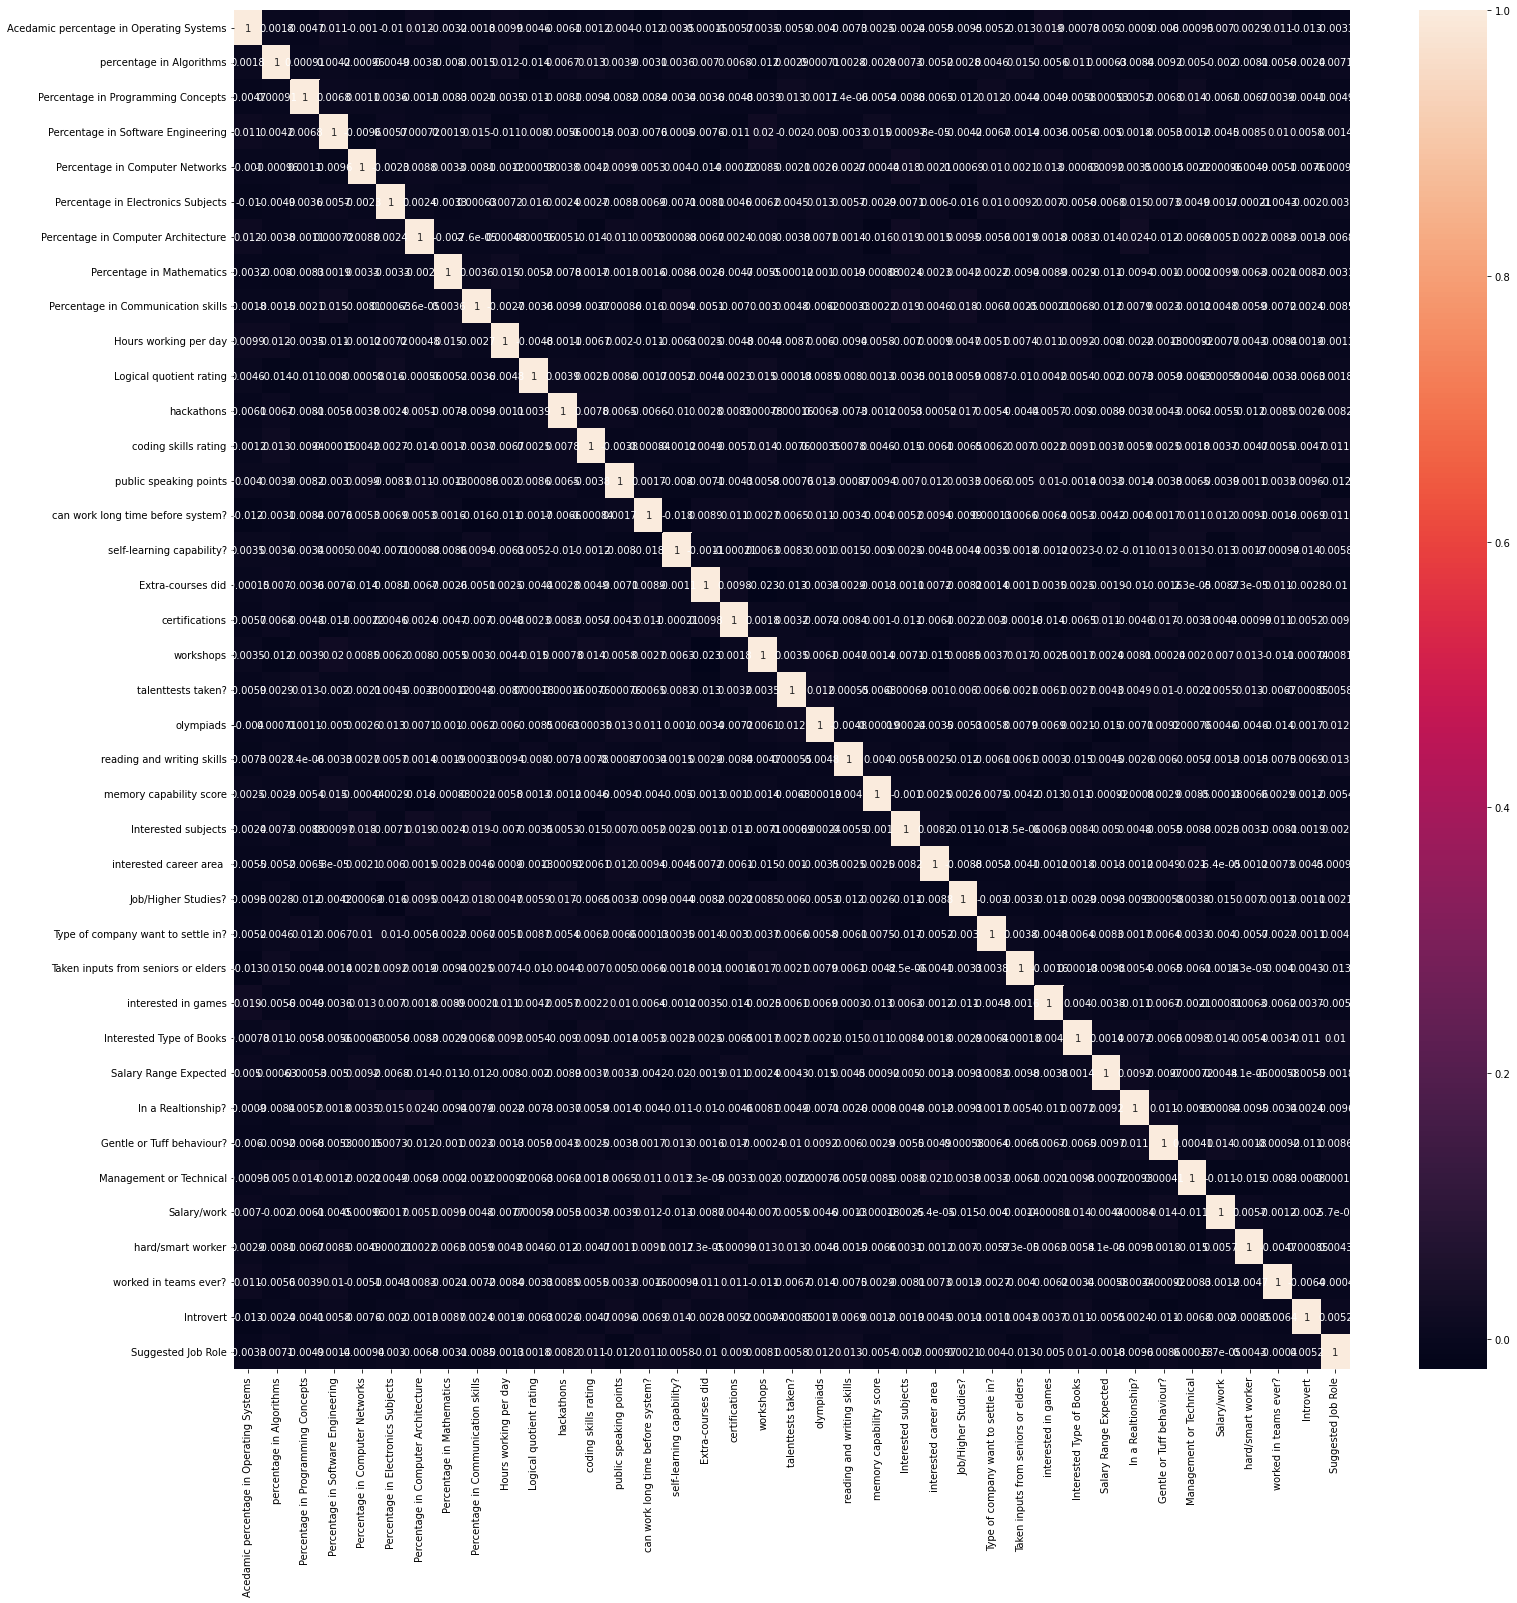

In [ ]:
plt.figure(figsize=(25,25))
corr = df.corr()
sns.heatmap(corr, annot = True)

**Extract the x data(features) and y data(class label) into numpy array from the dataframe**

In [ ]:
y = df['Suggested Job Role'].to_numpy()
x = df.drop(['Suggested Job Role'], axis=1).to_numpy()

# We will build the ANN model using MLPClassifier of sklearn

**(1) First, we will train a ANN model by not shuffling the data. We will show the accuracy on the following train-test split :- 90-10, 80-20, 70-30, 60-40, 50-50, 40-60, 30-70, 20-80, 10-90**

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = , shuffle = False)
test_size_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
x_axis = test_size_arr
y_axis = []
for size in test_size_arr:
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = size, shuffle = False)
  classifier = MLPClassifier(random_state = 0, max_iter = 2000, activation = 'tanh', alpha = 0.001, hidden_layer_sizes= (30), solver = 'sgd')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  y_axis.append(accuracy)

In [ ]:
y_axis

[0.186,
 0.1765,
 0.18133333333333335,
 0.19025,
 0.1931,
 0.19291666666666665,
 0.19464285714285715,
 0.194,
 0.19377777777777777]

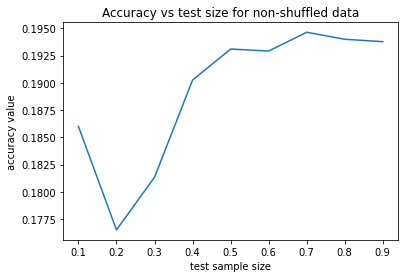

In [ ]:
plt.plot(x_axis, y_axis)
plt.xlabel('test sample size')
plt.ylabel('accuracy value')
plt.title('Accuracy vs test size for non-shuffled data')
plt.show()

*As we can see, we are getting the highest result with train-test split ratio of 30-70. Normally we should get high accuracies when training data is larger than testing data. We might be getting a graph like this because the training data is not shuffled due to which to which the model is not able to predict on the testing set properly.*

**(2) Second, we will train a ANN model by shuffling the data. We will show the accuracy on the following train-test split :- 90-10, 80-20, 70-30, 60-40, 50-50, 40-60, 30-70, 20-80, 10-90**

In [ ]:
test_size_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
x_axis = test_size_arr
y_axis = []
class_accuracies = []
for size in test_size_arr:
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = size, shuffle = True)
  classifier = MLPClassifier(random_state = 0, max_iter = 2000, activation = 'tanh', hidden_layer_sizes= (30), solver = 'sgd')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  y_axis.append(accuracy)
  matrix = confusion_matrix(y_test, y_pred)
  class_accuracies.append(matrix.diagonal()/matrix.sum(axis=1))

In [ ]:
y_axis

[0.1855,
 0.19775,
 0.19583333333333333,
 0.193875,
 0.1928,
 0.1955,
 0.19578571428571429,
 0.194,
 0.19261111111111112]

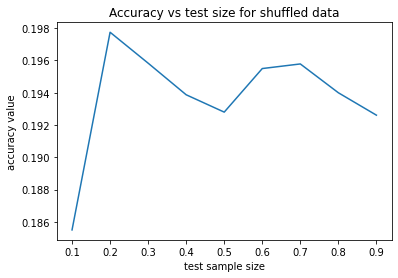

In [ ]:
plt.plot(x_axis, y_axis)
plt.xlabel('test sample size')
plt.ylabel('accuracy value')
plt.title('Accuracy vs test size for shuffled data')
plt.show()

*As we can see, we are getting the highest result with train-test split ratio of 80-20. This is correct as it makes sense that training set should have more data than testing set. The accuracy score for the same is :- 0.19775*

*From this, we can infer that the train-test should be 80-20 and shuffling the data should be done.*

**Here, we will check class-wise accuracy of the model with the parameters decided till now**

In [ ]:
print("The class wise accuracies of ANN model with train-test split ratio : 80-20 and shuffle=True are :-")
print(class_accuracies[1])

The class wise accuracies of ANN model with train-test split ratio : 80-20 and shuffle=True are :-
[0. 1. 0. 0. 0. 0. 0. 0.]


# **Further experimentation**

**Here, we are going to check if using standard scaling gives us better accuracy**

In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2, shuffle = True)
classifier = MLPClassifier(random_state = 0, max_iter = 2000, activation = 'tanh', hidden_layer_sizes= (30), solver = 'sgd')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy of standard scaled model is :-")
print(accuracy)

Accuracy of standard scaled model is :-
0.18675


In [ ]:
print("The class wise accuracies of ANN model with train-test split ratio : 80-20 and shuffle=True are :-")
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

The class wise accuracies of ANN model with train-test split ratio : 80-20 and shuffle=True are :-
[0.06851852 0.64575646 0.         0.00431034 0.22997033 0.04666667
 0.         0.        ]


*The accuracy of standard scaled model is 0.18675. Although it is lower than that of non-scaled one, however the class-wise accuracies of this model is more even and better. So, we will use the standard scaled model and try to optimize it more*

**Hyperparameter tuning using GridSearch**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.2, shuffle = True)

In [ ]:
classifier = MLPClassifier(max_iter = 2000, activation = 'tanh', solver = 'sgd')
parameters = {
    'hidden_layer_sizes': [(3,5),(5,)]
}

In [ ]:
clf = GridSearchCV(estimator = classifier, param_grid = parameters, n_jobs=-1, cv=5, verbose=5)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', max_iter=2000,
                                     solver='sgd'),
             n_jobs=-1, param_grid={'hidden_layer_sizes': [(3, 5), (5,)]},
             verbose=5)

**The following is the best hidden layer size we got**

In [ ]:
print(clf.best_params_)

{'hidden_layer_sizes': (3, 5)}


In [ ]:
y_pred = clf.predict(x_test)

**Accuracy achieved for this model**

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.20125


**The class-wise accuracies are as follows**

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

[0.         0.88985149 0.         0.         0.10641399 0.0211039
 0.         0.        ]


**The confusion matrix**

In [ ]:
print("The confusion matrix of the final prediction is as follows :- ")
print(matrix)

The confusion matrix of the final prediction is as follows :- 
[[  0 481   0   0  47  10   0   0]
 [  0 719   0   0  75  14   0   0]
 [  0 323   0   0  31   9   0   0]
 [  0 412   0   0  43  10   0   0]
 [  0 608   0   0  73   5   0   0]
 [  0 555   0   0  48  13   0   0]
 [  0 314   0   0  28   8   0   0]
 [  0 148   0   0  24   2   0   0]]
